Implemented By Muhammad Hanan Asghar

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/yolov3/dataset.zip"

In [2]:
with open('/content/predict.txt') as f:
  TEST_IMAGES = f.read().splitlines()

In [3]:
TEST_IMAGES[:5]

['dataset/images/crowd_mask66.jpg',
 'dataset/images/new_201.jpg',
 'dataset/images/194.jpg',
 'dataset/images/asian_mask37.jpg',
 'dataset/images/crowd_mask101.jpg']

In [4]:
import cv2
print(cv2.__version__)

4.5.2


In [ ]:
!pip install opencv-python --upgrade

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the Model
net = cv2.dnn.readNet('/content/drive/MyDrive/yolov4/yolov4_training_last.weights','/content/yolov4_test.cfg')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)

model = cv2.dnn_DetectionModel(net)
model.setInputParams(size=(416, 416), scale=1/255, swapRB=True)

# Loading the Classes
classes = []
with open('/content/classes.names', 'r') as f:
    classes = f.read().splitlines()

In [6]:
classes

['Mask', 'Without_mask']

In [7]:
import random

In [34]:
def detect(image):
  img = cv2.imread(image)
  __classes, scores, boxes = model.detect(img, 0.2, 0.4)
  colors = np.random.uniform(0, 255, size=(len(boxes), 3))
  for (classid, score, box) in zip(__classes, scores, boxes):
          color = random.choice(colors)
          label = "%s: %f" % (classes[classid[0]], round(score[0], 3))
          cv2.rectangle(img, box, color, 1)
          cv2.rectangle(img, (box[0], box[1]), (box[0]+box[2], box[1]-40), color, -1)
          # cv2.rectangle(img, ())
          cv2.putText(img, label, (box[0], box[1]-15),
                    cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255), 1)
  cv2_imshow(img)

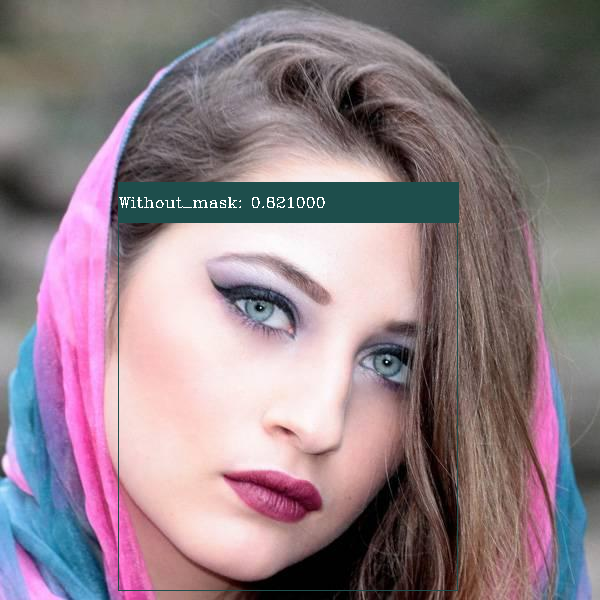

In [35]:
detect(random.choice(TEST_IMAGES))

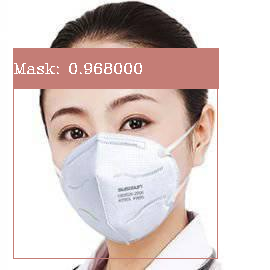

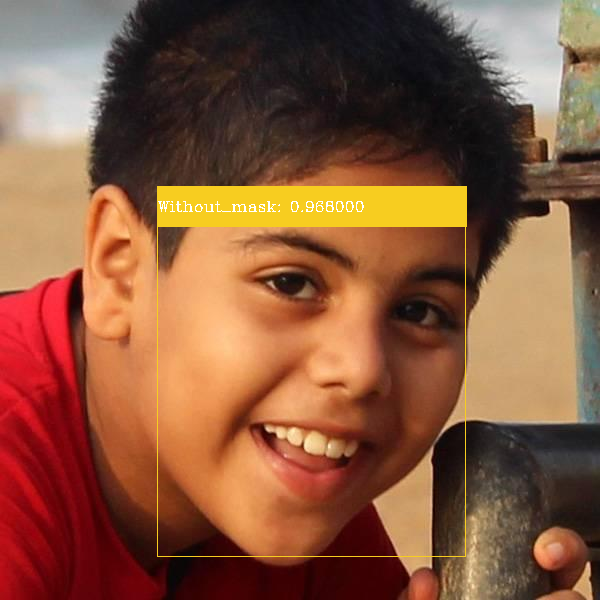

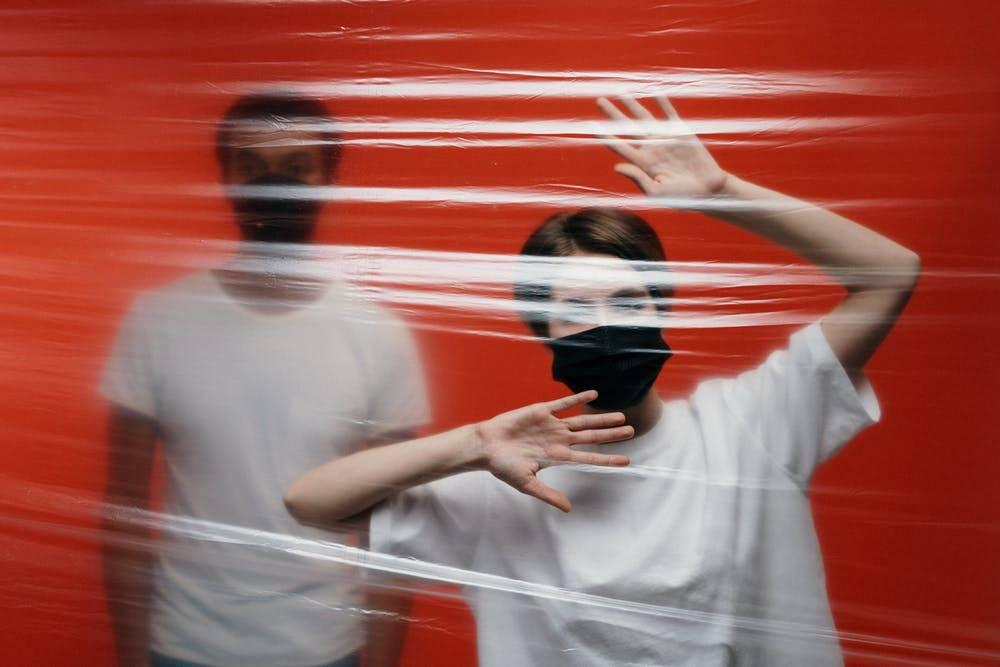

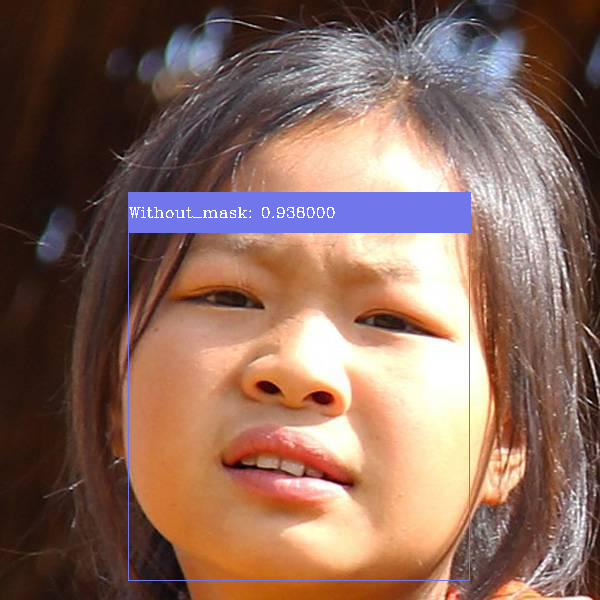

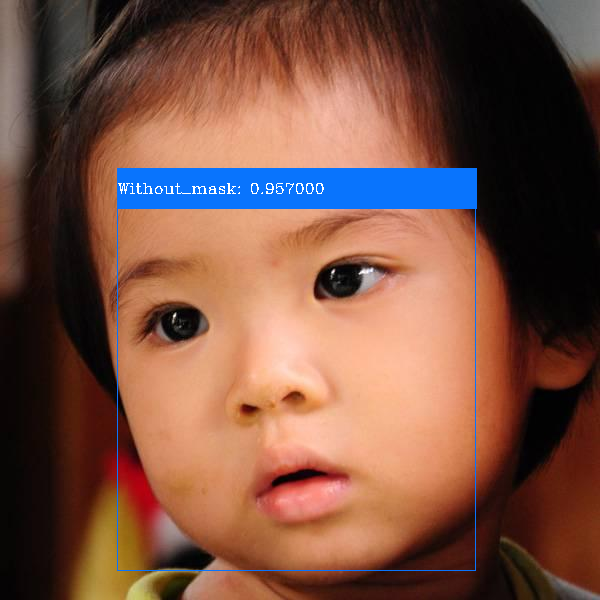

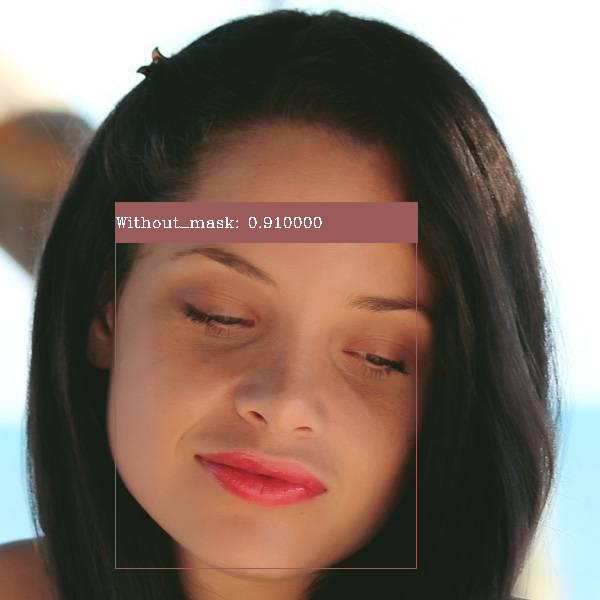

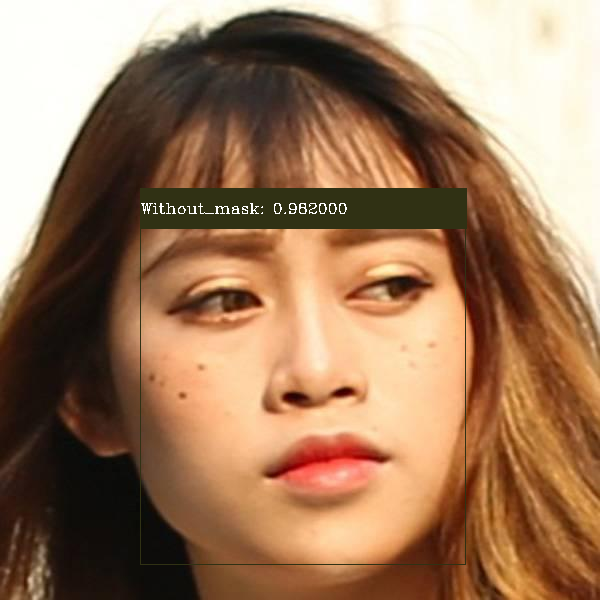

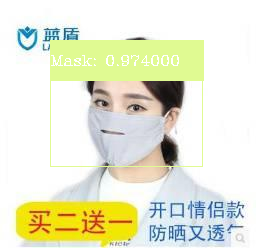

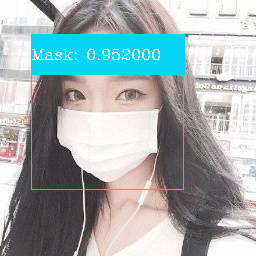

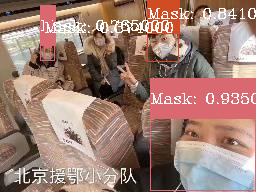

In [36]:
import random
for _ in range(10):
  detect(random.choice(TEST_IMAGES))